<a href="https://colab.research.google.com/github/azharm2412/PCD_Assignment02/blob/main/PCD_Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


```
Nama  : Azhar Maulana
NIM   : 24/533487/PA/22582
Kelas : KOMB
```


# **Pixel based Enhancement**
Pixel-based enhancement adalah metode peningkatan kualitas citra dengan memodifikasi intensitas (gray level) tiap piksel secara individual, tanpa memperhatikan intensitas  pixel tetangga.

## **Dark Image**

Analisis:
Min: 0, Max: 252, Mean: 72.77, Median: 66.00, Std Dev: 40.80


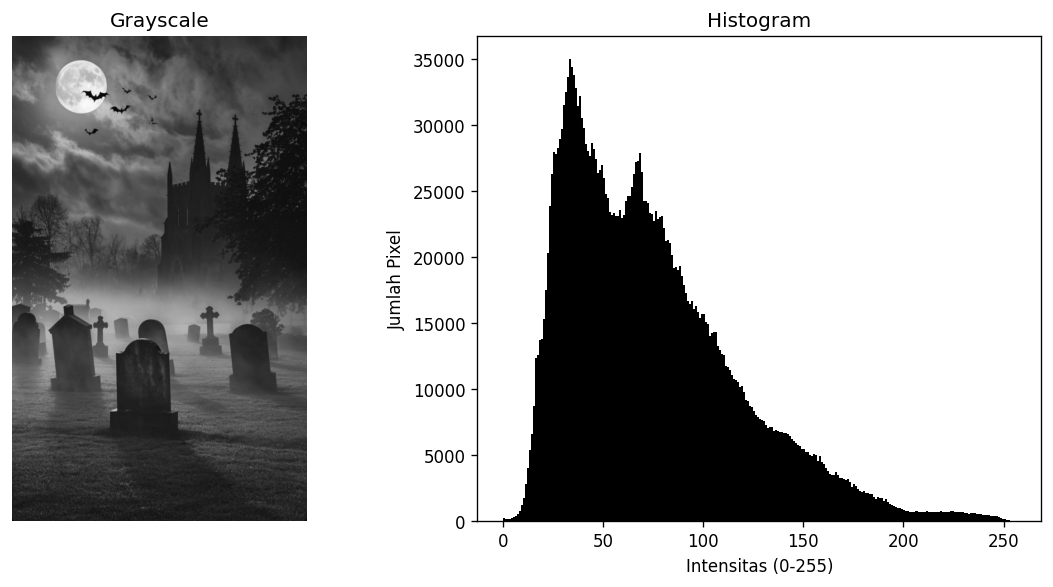

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

url = "https://raw.githubusercontent.com/azharm2412/PCD_Assignment02/main/images/06.jpg"
img_path = "06.jpg"

# download gambar
urllib.request.urlretrieve(url, img_path)

img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# analisis
mean_val = np.mean(gray)
median_val = np.median(gray)
std_dev = np.std(gray)
min_val = np.min(gray)
max_val = np.max(gray)

print("Analisis:")
print(f"Min: {np.min(gray)}, Max: {np.max(gray)}, Mean: {np.mean(gray):.2f}, Median: {np.median(gray):.2f}, Std Dev: {np.std(gray):.2f}")

plt.figure(dpi = 120, figsize=(10,5))

# menampilkan gambar
plt.subplot(1,2,1)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

# menampilkan histogram
plt.subplot(1,2,2)
plt.hist(img.ravel(), bins=256, range=[0,256], color='black')
plt.title("Histogram")
plt.xlabel("Intensitas (0-255)")
plt.ylabel("Jumlah Pixel")

plt.tight_layout()
plt.show()



Gambar di atas merupakan contoh **dark image (*under-exposed*)**. Hal ini ditunjukkan oleh histogram yang menumpuk di rentang intensitas rendah pada sisi kiri, sementara pada rentang menengah-tinggi relatif sedikit piksel. Perhatikan juga, rata-rata = 72,77 dan median = 66,00 menunjukkan bahwa sebagian besar piksel berada di area gelap. Namun, ada sedikit bagian yang terang, misalnya bulan, tetapi jumlahnya kecil sehingga kesan keseluruhan tetap gelap.

Untuk memperbaiki kualitas gambar tersebut, dapat dilakukan *image enhancement* (pixel-based) dengan beberapa metode, antara lain:
1. Histogram Equalization
2. Logarithmic Transform

### **Histogram Equalization**

Analisis:
Before -> Min: 0, Max: 252, Mean: 72.77, Median: 66.00, Std Dev: 40.80
After  -> Min: 0, Max: 255, Mean: 128.48, Median: 130.00, Std Dev: 73.32


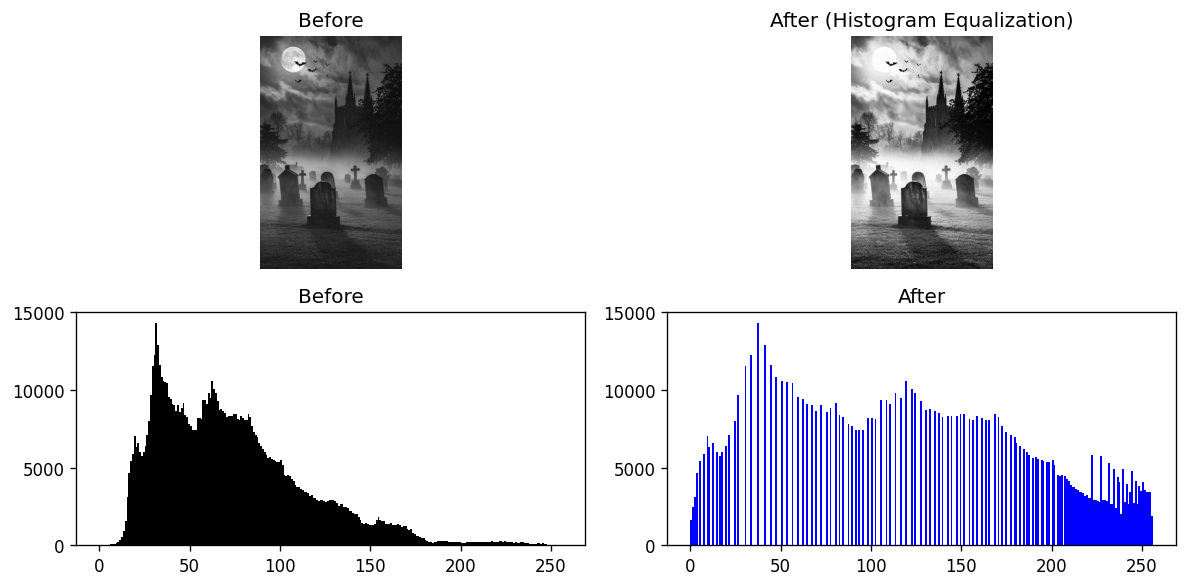

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

url = "https://raw.githubusercontent.com/azharm2412/PCD_Assignment02/main/images/06.jpg"
img_path = "06.jpg"

# download gambar
urllib.request.urlretrieve(url, img_path)

img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# histogram equalization
he = cv2.equalizeHist(gray)

# analisis
mean_val = np.mean(gray)
median_val = np.median(gray)
std_dev = np.std(gray)
min_val = np.min(gray)
max_val = np.max(gray)

print("Analisis:")
print(f"Before -> Min: {np.min(gray)}, Max: {np.max(gray)}, Mean: {np.mean(gray):.2f}, Median: {np.median(gray):.2f}, Std Dev: {np.std(gray):.2f}")
print(f"After  -> Min: {np.min(he)}, Max: {np.max(he)}, Mean: {np.mean(he):.2f}, Median: {np.median(he):.2f}, Std Dev: {np.std(he):.2f}")

plt.figure(dpi = 120, figsize=(10,5))

plt.subplot(2,2,1)
plt.imshow(gray, cmap="gray")
plt.title("Before")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(he, cmap="gray")
plt.title("After (Histogram Equalization)")
plt.axis("off")

plt.subplot(2,2,3)
plt.hist(gray.ravel(), bins=256, range=[0,256], color='black')
plt.title("Before")

plt.subplot(2,2,4)
plt.hist(he.ravel(), bins=256, range=[0,256], color='blue')
plt.title("After")

plt.tight_layout()
plt.show()

## **Analisis**

---


Setelah diterapkan **Histogram Equalization**, citra yang semula cenderung gelap (*under-exposed*) mengalami peningkatan kualitas visual yang signifikan. Sebelum pemrosesan, histogram terkonsentrasi di sisi kiri dengan nilai mean 72,77 dan median 66,00, menandakan dominasi intensitas rendah. Rentang kontras juga terbatas dengan standar deviasi 40,80 sehingga detail pada area gelap sulit terlihat.

Sesudah **histogram equalization**, distribusi intensitas menyebar lebih merata ke seluruh rentang 0–255. Nilai mean naik menjadi 128,48 dan median menjadi 130,00, menunjukkan citra kini memiliki tingkat kecerahan yang lebih seimbang. Standar deviasi meningkat drastis menjadi 73,32, yang berarti variasi intensitas semakin besar dan kontras global jauh lebih baik. Secara visual, detail yang sebelumnya tersembunyi pada area gelap kini tampak lebih jelas, sementara pencahayaan citra keseluruhan terlihat lebih natural.

## **Logarithmic Transform**

Analisis:
Before -> Min: 0, Max: 252, Mean: 72.77, Median: 66.00, Std Dev: 40.80
After  -> Min: 0, Max: 254, Mean: 190.45, Median: 193.00, Std Dev: 26.54


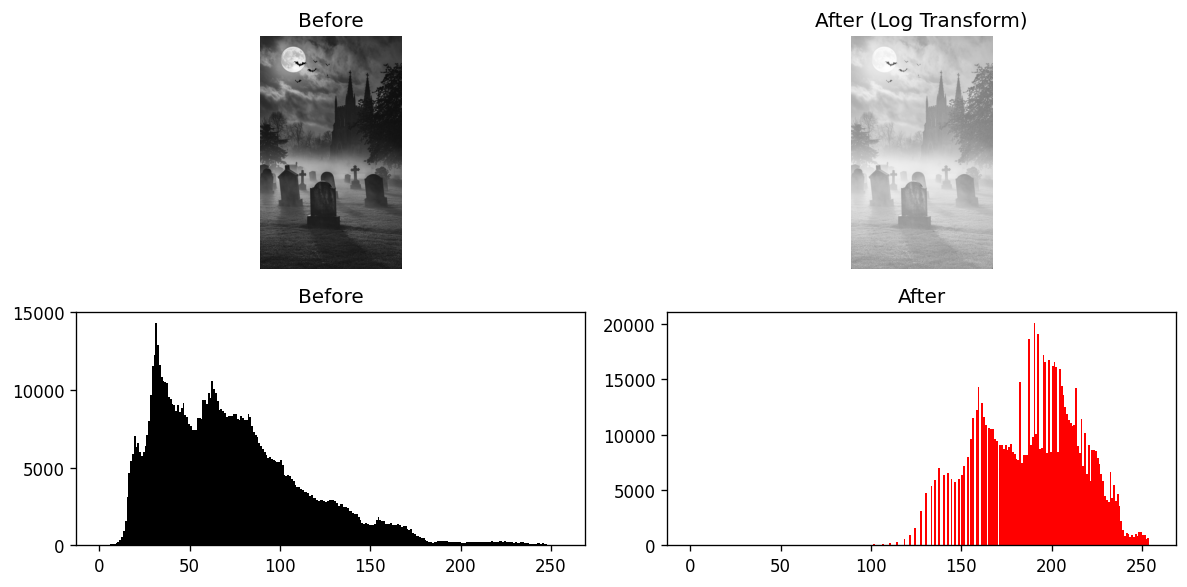

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

url = "https://raw.githubusercontent.com/azharm2412/PCD_Assignment02/main/images/06.jpg"
img_path = "06.jpg"

# download gambar
urllib.request.urlretrieve(url, img_path)

img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# log transform
c = 255 / np.log(1 + np.max(gray))
gray_float = gray.astype(np.float64)
log_transformed_float = c * np.log(1 + gray_float)
log_transformed = log_transformed_float.astype(np.uint8)

print("Analisis:")
print(f"Before -> Min: {np.min(gray)}, Max: {np.max(gray)}, Mean: {np.mean(gray):.2f}, Median: {np.median(gray):.2f}, Std Dev: {np.std(gray):.2f}")
print(f"After  -> Min: {np.min(log_transformed)}, Max: {np.max(log_transformed)}, Mean: {np.mean(log_transformed):.2f}, Median: {np.median(log_transformed):.2f}, Std Dev: {np.std(log_transformed):.2f}")

plt.figure(dpi = 120, figsize=(10,5))

plt.subplot(2,2,1)
plt.imshow(gray, cmap="gray")
plt.title("Before")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(log_transformed, cmap="gray")
plt.title("After (Log Transform)")
plt.axis("off")

plt.subplot(2,2,3)
plt.hist(gray.ravel(), bins=256, range=[0,256], color='black')
plt.title("Before")

plt.subplot(2,2,4)
plt.hist(log_transformed.ravel(), bins=256, range=[0,256], color='red')
plt.title("After")

plt.tight_layout()
plt.show()

## **Analisis**


---


Setelah diterapkan Log Transform, distribusi intensitas citra mengalami perubahan signifikan. Nilai mean meningkat dari 72,77 menjadi 190,45 dan median dari 66,00 menjadi 193,00, yang menandakan keseluruhan citra menjadi jauh lebih terang. Histogram bergeser ke kanan dengan mayoritas piksel terkonsentrasi pada rentang tinggi (sekitar 150–250). Namun, sebaran intensitas menyempit sehingga standar deviasi justru menurun dari 40,80 menjadi 26,54.

Secara visual, detail pada area gelap (shadow) yang sebelumnya sulit terlihat kini muncul lebih jelas, terutama pada objek di bagian depan dan latar. Akan tetapi, karena rentang intensitas semakin sempit, kontras global menurun, membuat perbedaan antara area terang dan gelap terlihat kurang tajam. Transformasi log efektif untuk mencerahkan citra gelap dan menampilkan detail tersembunyi, tetapi efek sampingnya adalah citra tampak datar akibat kontras yang berkurang.


## **Bright Image**

Analisis:
Min: 1, Max: 255, Mean: 222.85, Median: 252.00, Std Dev: 51.41


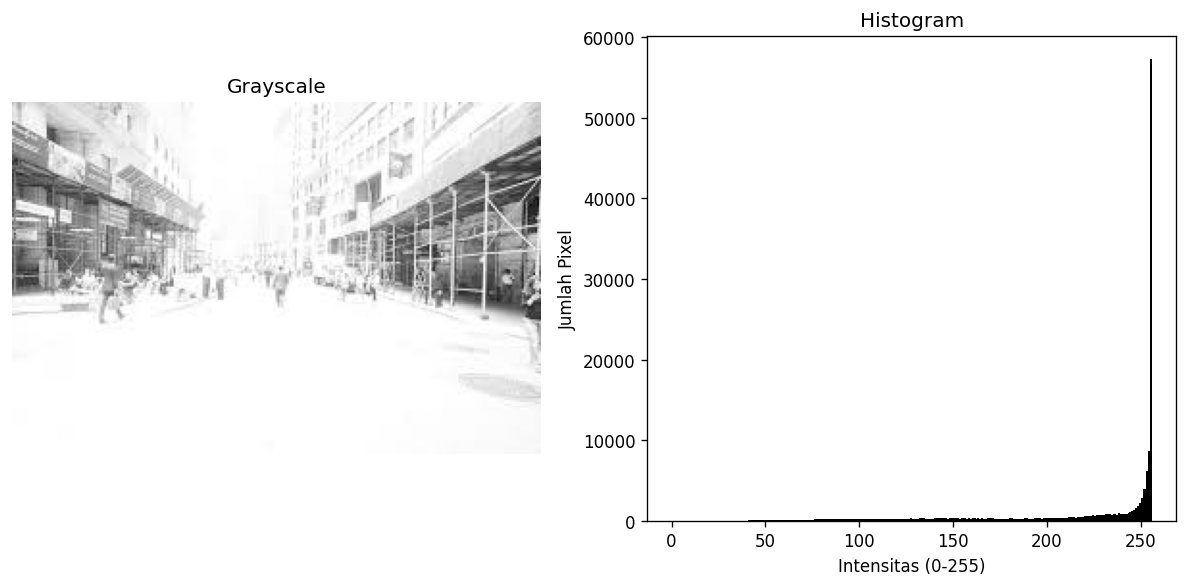

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

url = "https://raw.githubusercontent.com/azharm2412/PCD_Assignment02/main/images/10.jpg"
img_path = "10.jpg"

# download gambar
urllib.request.urlretrieve(url, img_path)

img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# analisis
mean_val = np.mean(gray)
median_val = np.median(gray)
std_dev = np.std(gray)
min_val = np.min(gray)
max_val = np.max(gray)

print("Analisis:")
print(f"Min: {np.min(gray)}, Max: {np.max(gray)}, Mean: {np.mean(gray):.2f}, Median: {np.median(gray):.2f}, Std Dev: {np.std(gray):.2f}")

plt.figure(dpi = 120, figsize=(10,5))

# menampilkan gambar
plt.subplot(1,2,1)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

# menampilkan histogram
plt.subplot(1,2,2)
plt.hist(img.ravel(), bins=256, range=[0,256], color='black')
plt.title("Histogram")
plt.xlabel("Intensitas (0-255)")
plt.ylabel("Jumlah Pixel")

plt.tight_layout()
plt.show()

Gambar di atas merupakan contoh **bright image (*over-exposed*)**. Hal ini terlihat dari histogram yang menumpuk di sisi kanan (rentang intensitas tinggi). Nilai mean = 222,85 dan median = 252,00 menunjukkan mayoritas piksel sangat terang. Sebarannya juga sempit (std dev = 51,41) sehingga detail di area highlight hilang dan kontras keseluruhan rendah.

Untuk memperbaiki tampilan, dapat dilakukan image enhancement (pixel-based), misalnya **Gamma correction**.

## **Gamma Correction**

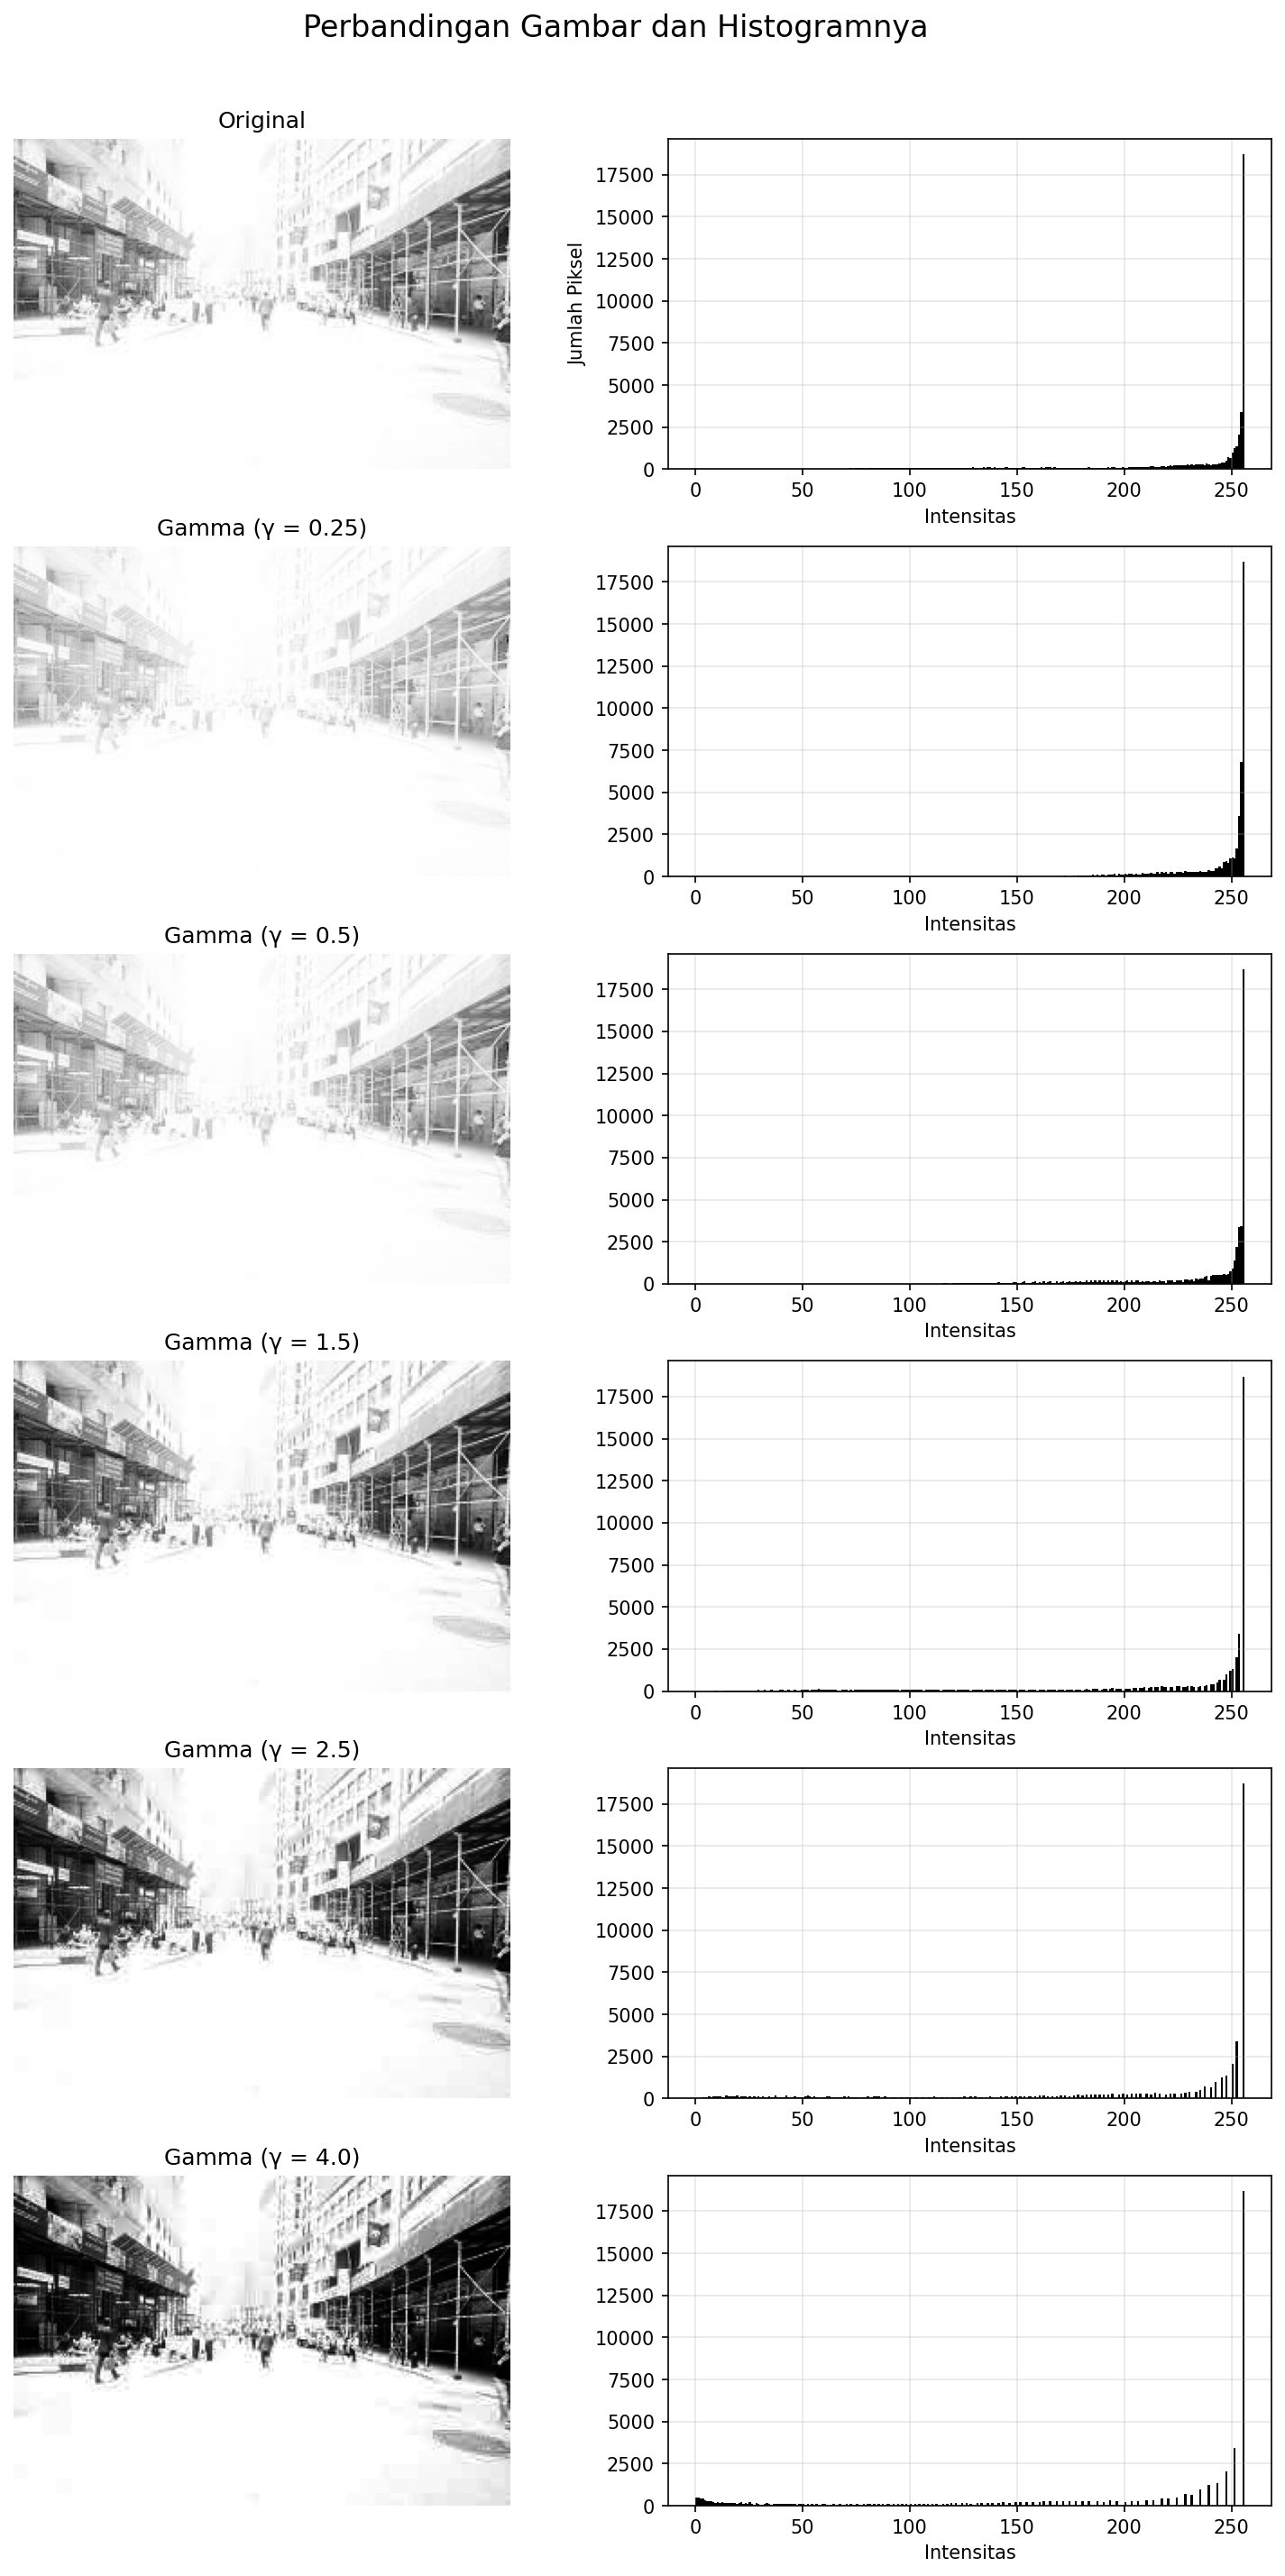

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

url = "https://raw.githubusercontent.com/azharm2412/PCD_Assignment02/main/images/10.jpg"
img_path = "10.jpg"

urllib.request.urlretrieve(url, img_path)

img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gamma_values = [0.25, 0.5, 1.5, 2.5, 4.0]

images_to_plot = [
    {'title': 'Original', 'image': gray}
]

for gamma in gamma_values:
    corrected_img = np.array(255 * (gray / 255.0) ** gamma, dtype='uint8')
    images_to_plot.append(
        {'title': f'Gamma (γ = {gamma})', 'image': corrected_img}
    )

plt.figure(dpi=150, figsize=(10, 20))
plt.suptitle('Perbandingan Gambar dan Histogramnya', fontsize=16)

for i, data in enumerate(images_to_plot):
    image = data['image']
    title = data['title']

    image_subplot_index = 2 * i + 1
    hist_subplot_index = 2 * i + 2

    plt.subplot(6, 2, image_subplot_index)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')

    plt.subplot(6, 2, hist_subplot_index)
    plt.hist(image.ravel(), bins=256, range=[0, 256], color='black')

    if i == 0:
        plt.ylabel('Jumlah Piksel')
    plt.xlabel('Intensitas')
    plt.grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

## **Analisis**


---

Pada citra asli terlihat kondisi over-exposed, di mana sebagian besar piksel berada pada intensitas sangat tinggi mendekati 255. Hal ini terlihat dari histogram yang menumpuk di ujung kanan, menandakan dominasi area terang dan hilangnya detail pada bagian tertentu.

Setelah diterapkan gamma correction dengan berbagai nilai γ:

* γ = 0.25 dan 0.5 → Citra justru menjadi semakin terang. Histogram semakin terdorong ke kanan, menunjukkan dominasi intensitas tinggi makin kuat. Kondisi ini memperparah *over-exposure* sehingga detail makin hilang.

* γ = 1.5 → Histogram mulai bergeser sedikit ke kiri. Citra tampak agak lebih gelap, tetapi efeknya masih terbatas sehingga area terang masih dominan.

* γ = 2.5 → Histogram bergeser lebih jauh ke kiri. Citra terlihat lebih seimbang, bagian yang sebelumnya terlalu terang mulai terkendali, dan detail pada area bangunan serta jalan lebih mudah terlihat.

* γ = 4.0 → Histogram banyak terdistribusi di intensitas rendah. Citra menjadi terlalu gelap sehingga banyak area kehilangan detail, terutama di bagian bayangan.

Dari hasil ini, dapat disimpulkan bahwa untuk citra *over-exposed*, penggunaan γ > 1 memang efektif untuk menurunkan kecerahan dan memperbaiki distribusi intensitas. Pada contoh ini, nilai γ sekitar 2.0–2.5 menghasilkan tampilan yang paling seimbang karena area terang menjadi lebih terkendali sementara detail di bagian bangunan dan jalan lebih jelas. Namun, detail yang sudah hilang akibat saturasi putih (pure white) tetap tidak dapat dipulihkan dengan gamma correction.



## **Low Contrast Image**

Analisis:
Min: 158, Max: 254, Mean: 220.51, Median: 221.00, Std Dev: 14.01


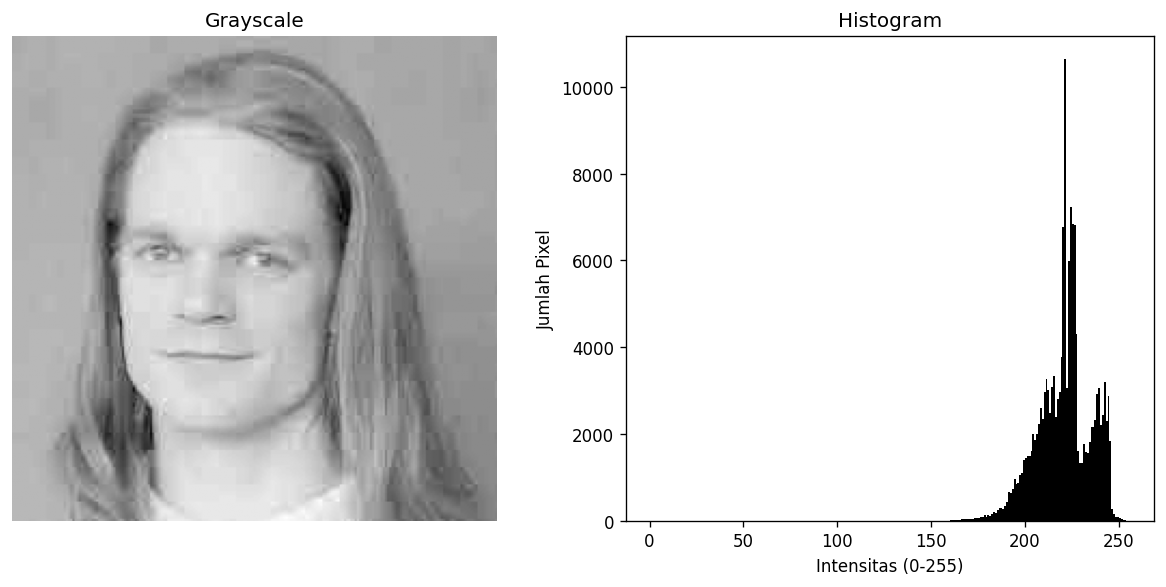

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

url = "https://raw.githubusercontent.com/azharm2412/PCD_Assignment02/main/images/02.jpg"
img_path = "02.jpg"

# download gambar
urllib.request.urlretrieve(url, img_path)

img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print("Analisis:")
print(f"Min: {np.min(gray)}, Max: {np.max(gray)}, Mean: {np.mean(gray):.2f}, Median: {np.median(gray):.2f}, Std Dev: {np.std(gray):.2f}")

plt.figure(dpi = 120, figsize=(10,5))

# menampilkan gambar
plt.subplot(1,2,1)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

# menampilkan histogram
plt.subplot(1,2,2)
plt.hist(img.ravel(), bins=256, range=[0,256], color='black')
plt.title("Histogram")
plt.xlabel("Intensitas (0-255)")
plt.ylabel("Jumlah Pixel")

plt.tight_layout()
plt.show()

Gambar di atas merupakan contoh *low contrast image*. Hal ini ditunjukkan oleh histogram yang memperlihatkan distribusi intensitas menumpuk pada rentang 180–250 (bagian kanan), sementara pada rentang rendah hampir tidak terdapat nilai piksel. Akibatnya, detail pada area gelap maupun terang tidak terlihat jelas.

Untuk memperbaiki kualitas gambar tersebut, dapat dilakukan **image enhancement** dengan beberapa metode, antara lain:

1. Contrast Stretching
2. Histogram Equalization

## **Contrast Stretching**



Analisis:
Min: 0, Max: 255, Mean: 165.56, Median: 167.00, Std Dev: 37.21


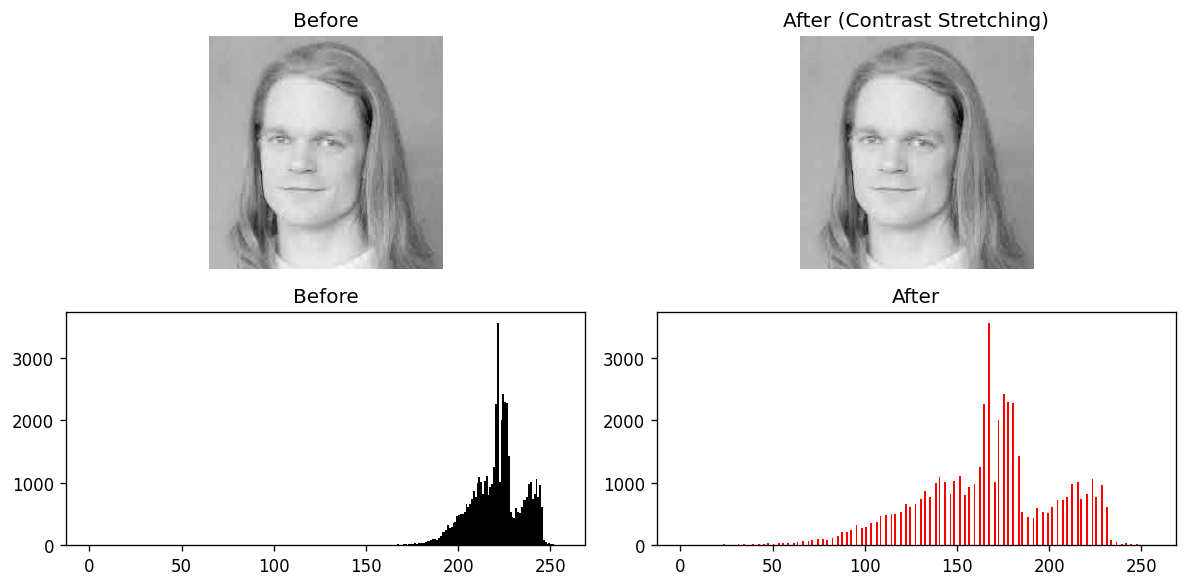

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

url = "https://raw.githubusercontent.com/azharm2412/PCD_Assignment02/main/images/02.jpg"
img_path = "02.jpg"

# download gambar
urllib.request.urlretrieve(url, img_path)

img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

if img is None:
    raise Exception("Gambar tidak ditemukan")
else:
  # parameter
  a = 0
  b = 255
  min_value = np.min(gray)
  max_value = np.max(gray)

  img_contrast = ((gray - min_value) * ((b-a) / (max_value - min_value))) + a
  img_contrast = np.uint8(img_contrast)

  print("Analisis:")
  print(f"Min: {np.min(img_contrast)}, Max: {np.max(img_contrast)}, Mean: {np.mean(img_contrast):.2f}, Median: {np.median(img_contrast):.2f}, Std Dev: {np.std(img_contrast):.2f}")

  plt.figure(dpi = 120, figsize=(10,5))

  # menampilkan before-after gambar
  plt.subplot(2,2,1)
  plt.imshow(gray, cmap="gray")
  plt.title("Before")
  plt.axis("off")

  plt.subplot(2,2,2)
  plt.imshow(img_contrast, cmap="gray")
  plt.title("After (Contrast Stretching)")
  plt.axis("off")

  # menampilkan before-after histogram
  plt.subplot(2,2,3)
  plt.hist(gray.ravel(), bins=256, range=[0,256], color='black')
  plt.title("Before")

  plt.subplot(2,2,4)
  plt.hist(img_contrast.ravel(), bins=256, range=[0,256], color='red')
  plt.title("After")

  plt.tight_layout()
  plt.show()

## **Analisis**


---


Setelah dilakukan contrast stretching, gambar terlihat lebih jelas dan detail wajah menjadi lebih menonjol. Pada gambar asli, sebagian besar piksel berada di area terang sehingga kontrasnya rendah dan membuat beberapa detail kurang terlihat. Setelah diproses, histogram gambar melebar hingga mencakup rentang penuh dari 0 sampai 255. Hal ini membuat bagian gelap menjadi lebih pekat dan bagian terang tetap terlihat cerah sehingga perbedaan antara gelap dan terang semakin jelas. Akibatnya, kontras gambar meningkat dan struktur wajah seperti mata, bibir, dan rambut tampak lebih tegas. Namun, detail yang sudah terlalu terang dari awal tetap tidak bisa dipulihkan, karena contrast stretching hanya memperlebar sebaran intensitas tanpa mengembalikan informasi yang hilang.

## **Histogram Equalization**


Analisis:
Min: 0, Max: 255, Mean: 130.82, Median: 132.00, Std Dev: 74.06


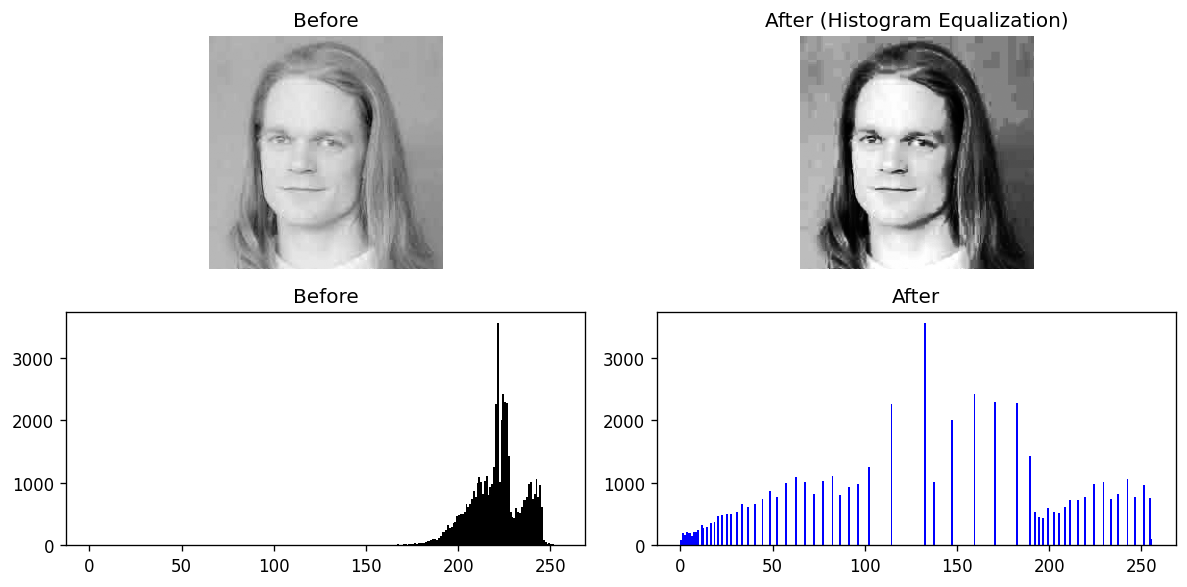

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

url = "https://raw.githubusercontent.com/azharm2412/PCD_Assignment02/main/images/02.jpg"
img_path = "02.jpg"

# download gambar
urllib.request.urlretrieve(url, img_path)

img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# histogram equalization
he = cv2.equalizeHist(gray)

print("Analisis:")
print(f"Min: {np.min(he)}, Max: {np.max(he)}, Mean: {np.mean(he):.2f}, Median: {np.median(he):.2f}, Std Dev: {np.std(he):.2f}")

plt.figure(dpi = 120, figsize=(10,5))

plt.subplot(2,2,1)
plt.imshow(gray, cmap="gray")
plt.title("Before")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(he, cmap="gray")
plt.title("After (Histogram Equalization)")
plt.axis("off")

plt.subplot(2,2,3)
plt.hist(gray.ravel(), bins=256, range=[0,256], color='black')
plt.title("Before")

plt.subplot(2,2,4)
plt.hist(he.ravel(), bins=256, range=[0,256], color='blue')
plt.title("After")

plt.tight_layout()
plt.show()


## **Analisis**


---

Setelah dilakukan **Histogram Equalization**, distribusi piksel jadi lebih merata dan menyebar ke hampir seluruh area (0-255). Hasilnya, kontur wajah dan helai rambut jadi lebih kelihatan, menunjukkan kontras gambar meningkat. Hal ini terjadi karena Histogram Equalization bekerja dengan mentransformasi nilai intensitas berdasarkan distribusi kumulatif histogram sehingga area yang tadinya padat piksel “dipaksa” menyebar ke rentang intensitas yang lebih luas. Akibatnya, detail yang sebelumnya tersembunyi pada level abu-abu (grayscale) tertentu menjadi lebih menonjol.

# **Filtering based Enhancement**
Filtering-based enhancement adalah teknik peningkatan kualitas citra dengan menggunakan operasi filter (konvolusi) untuk memodifikasi intensitas piksel berdasarkan nilai tetangganya. Tujuannya bisa untuk mengurangi noise, menghaluskan (smoothing), atau meningkatkan ketajaman (sharpening).

## **Noisy Image**

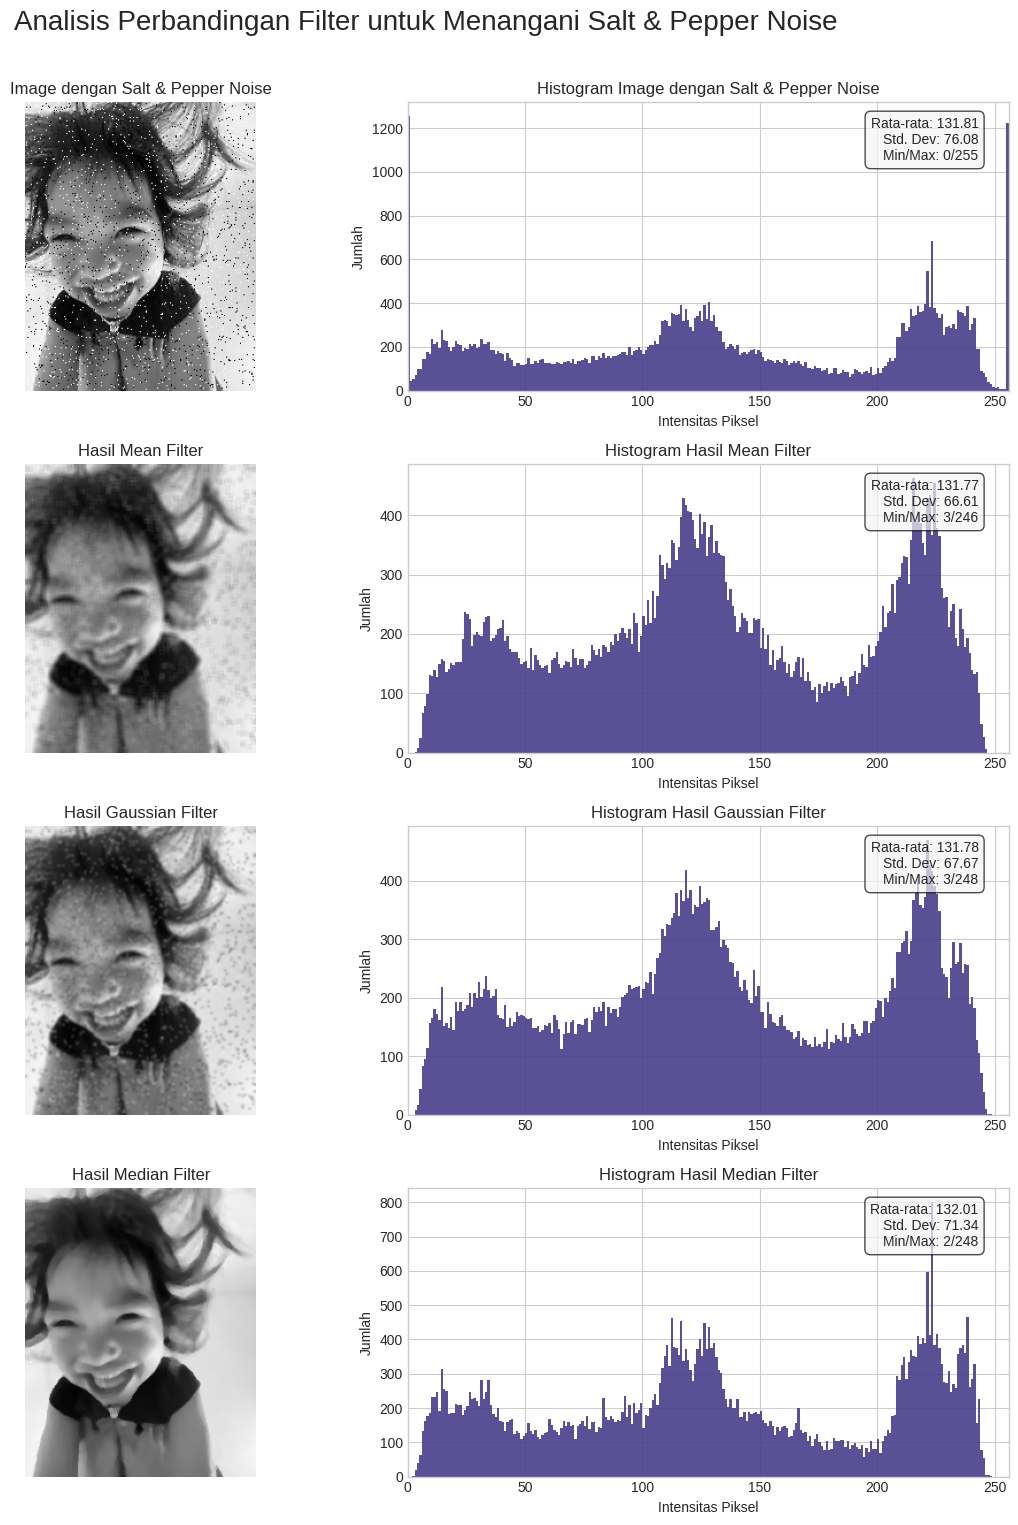

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

url = "https://raw.githubusercontent.com/azharm2412/PCD_Assignment02/main/images/11.jpg"
img_path = "11.jpg"

urllib.request.urlretrieve(url, img_path)
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# fungsi untuk menambah salt and pepper
def add_salt_and_pepper_noise(image, amount):
    output_image = np.copy(image)

    num_salt = np.ceil(amount * image.size * 0.5)
    coords = tuple(np.random.randint(0, i - 1, int(num_salt)) for i in image.shape)
    output_image[coords] = 255

    num_pepper = np.ceil(amount * image.size * 0.5)
    coords = tuple(np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape)
    output_image[coords] = 0
    return output_image

# noise sebanyak 5%
noisy_image = add_salt_and_pepper_noise(gray, 0.05)

# filter
ksize = 5

# mean filter
mean_filtered = cv2.blur(noisy_image, (ksize, ksize))

# gaussian filter
gaussian_filtered = cv2.GaussianBlur(noisy_image, (ksize, ksize), 0)

# median filter
median_filtered = cv2.medianBlur(noisy_image, ksize)

# visualisasi
images_to_analyze = [
    {'title': 'Image dengan Salt & Pepper Noise', 'image': noisy_image},
    {'title': 'Hasil Mean Filter', 'image': mean_filtered},
    {'title': 'Hasil Gaussian Filter', 'image': gaussian_filtered},
    {'title': 'Hasil Median Filter', 'image': median_filtered}
]

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 16), dpi=100)
plt.suptitle('Analisis Perbandingan Filter untuk Menangani Salt & Pepper Noise', fontsize=20, y=0.95)

# loop untuk menampilkan setiap gambar, histogram, dan statistiknya
for i, data in enumerate(images_to_analyze):
    img_data = data['image']
    title = data['title']

    mean_val = np.mean(img_data)
    std_dev = np.std(img_data)
    min_val = np.min(img_data)
    max_val = np.max(img_data)

    plt.subplot(4, 2, 2*i + 1)
    plt.imshow(img_data, cmap='gray', vmin=0, vmax=255)
    plt.title(title, fontsize=12)
    plt.axis('off')

    plt.subplot(4, 2, 2*i + 2)
    plt.hist(img_data.ravel(), bins=256, range=[0, 256], color='darkslateblue', alpha=0.9)
    plt.title(f'Histogram {title}', fontsize=12)
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Jumlah')
    plt.xlim([0, 256])

    stats_text = (f"Rata-rata: {mean_val:.2f}\n"
                  f"Std. Dev: {std_dev:.2f}\n"
                  f"Min/Max: {min_val}/{max_val}")

    plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round,pad=0.4', fc='whitesmoke', alpha=0.7))

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

## **Analisis**


---


### **Mean Filter**

Noise salt & pepper berhasil dihilangkan. Titik-titik hitam dan putih ekstrem sudah tidak terlihat. Namun, ada efek samping yang signifikan yaitu gambar menjadi kabur (blur). Detail penting seperti garis mata, senyum, dan helai rambut menjadi sangat halus dan kehilangan ketajamannya. Standar deviasi turun signifikan dari 76.14 menjadi 66.87. Dengan merata-ratakan piksel, perbedaan antara piksel yang berdekatan menjadi lebih kecil sehingga variasi intensitas secara keseluruhan menurun. Penurunan deviasi ini yang menyebabkan gambar kehilangan kontras lokal dan terlihat blur karena perbedaan antara piksel terang dan gelap menjadi lebih kecil.

### **Gaussian Filter**
Hasil Gaussian Filter menunjukkan bahwa noise salt & pepper berkurang, terutama nilai ekstrem 0 dan 255 yang berhasil ditekan sehingga rentang piksel menyempit dari 0–255 menjadi 3–247. Nilai rata-rata tetap stabil (≈132), sementara standar deviasi turun dari 76.14 menjadi 67.91, menandakan perataan intensitas. Secara visual, citra menjadi lebih halus, tetapi efek blur cukup kuat dan detail penting ikut melemah. Walaupun secara teori Gaussian lebih baik dari Mean Filter dalam menjaga transisi, untuk noise impuls seperti salt & pepper hasilnya kurang memuaskan karena outlier tetap ikut memengaruhi perhitungan.

### **Median Filter**
Penerapan Median Filter sangat efektif dalam menghilangkan salt & pepper noise. Hampir semua titik hitam dan putih ekstrem berhasil hilang sehingga citra terlihat jauh lebih bersih dibandingkan hasil Mean maupun Gaussian Filter. Detail penting seperti garis wajah, senyum, dan rambut juga lebih terjaga, meskipun ada sedikit pelembutan. Secara statistik, rata-rata tetap stabil di sekitar 132, standar deviasi turun menjadi 71.37 (lebih tinggi dibanding Gaussian dan Mean), yang menunjukkan bahwa variasi intensitas dan ketajaman detail masih cukup terpelihara. Rentang piksel juga mengecil dari 0–255 menjadi 2–247, menandakan nilai ekstrem telah ditekan. Dengan hasil ini, Median Filter terbukti paling efektif untuk menangani noise impuls karena mampu membersihkan noise sekaligus mempertahankan struktur tepi citra.

## **Blurred Image**


Dalam menangani blurred image, salah satu cara yang bisa dilakukan adalah dengan **sharpening** menggunakan **filter laplacian**. Filter ini digunakan untuk mendeteksi area dengan perubahan intensitas piksel yang cepat. Metode ini bekerja dnegan 2 cara:
1. Deteksi Tepi: Menerapkan kernel Laplacian pada gambar asli untuk menghasilkan "gambar tepi" (laplacian image). Gambar ini akan menyorot semua garis tepi dan detail halus, sementara area yang datar (tanpa tepi) akan mendekati nol.
2. Kombinasi Gambar: Menggabungkan gambar tepi ini dengan gambar asli untuk menonjolkan tepi yang telah terdeteksi. Rumus yang digunakan adalah:
m(x, y) = f(x, y) - fb (x, y), dimana f(x, y) adalah original image dan fb(x, y) adalah blurred image. Blurred image diperoleh dari perkalian α dengan laplacian image yang sudah kita cari di langkah 1. α adalah faktor skala dan di sini saya menggunakan α = 1.

Terdapat beberapa filter laplacian yang dapat digunakan, tetapi di sini saya hanya akan menguji untuk 2 kernel saja.

## **Menggunakan Kernel:**
```
[0,  1,  0]
[1, -4,  1]
[0,  1,  0]

```

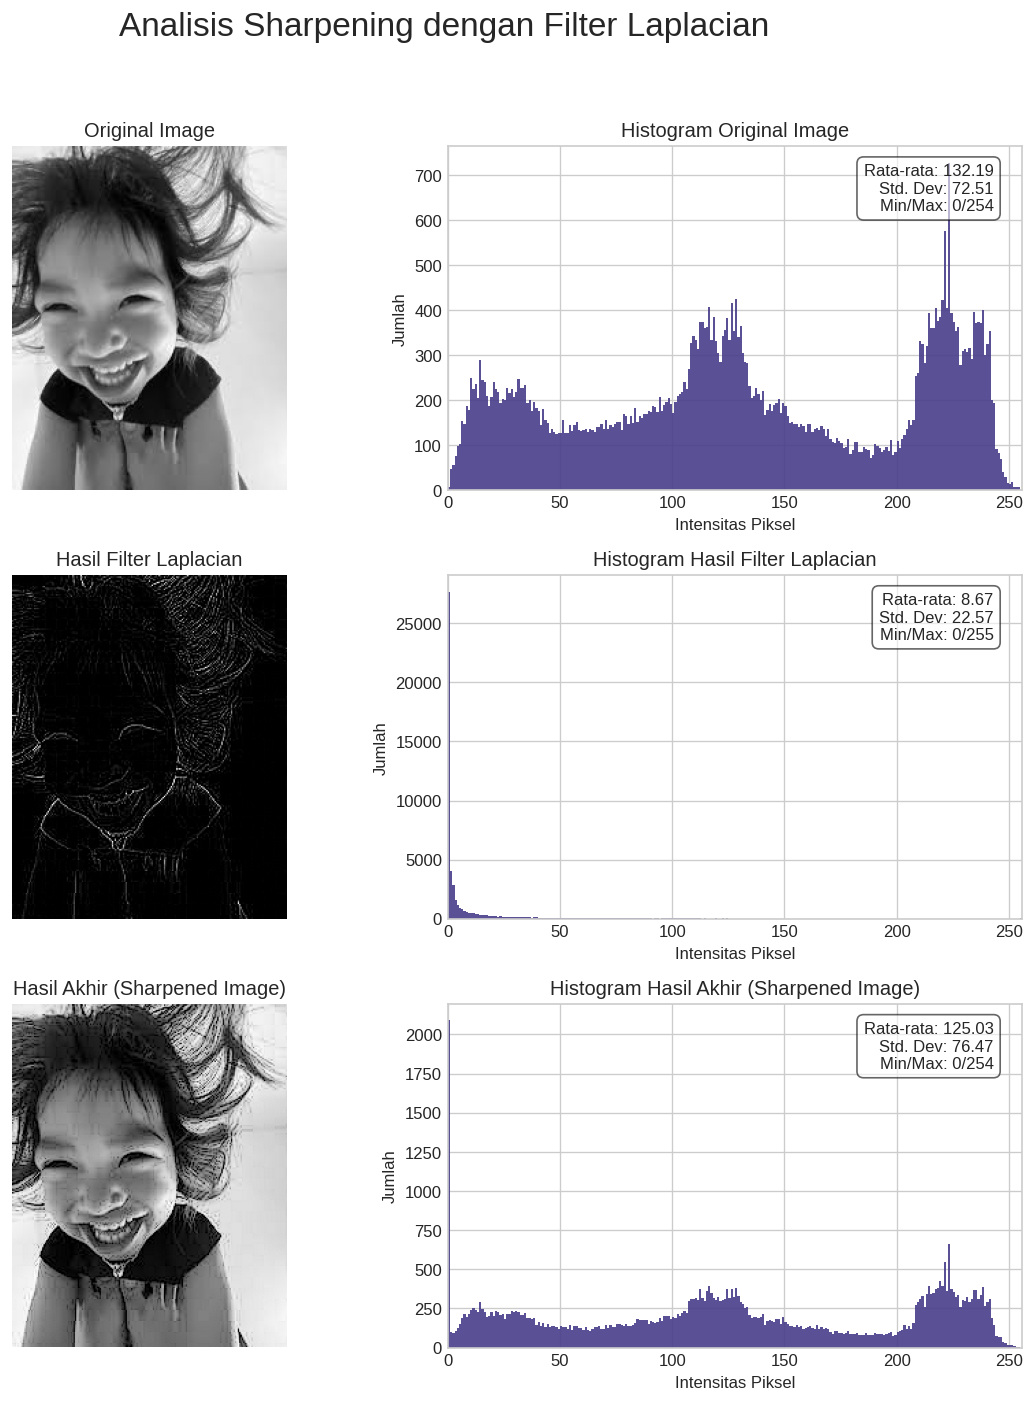

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

url = "https://raw.githubusercontent.com/azharm2412/PCD_Assignment02/main/images/11.jpg"
img_path = "11.jpg"

urllib.request.urlretrieve(url, img_path)
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sharpen_kernel_laplacian = np.array([
    [0,  1,  0],
    [1, -4,  1],
    [0,  1,  0]
])

laplacian_image = cv2.filter2D(gray, -1, kernel=sharpen_kernel_laplacian)
final_sharpened_image = cv2.subtract(gray, laplacian_image)

images_to_analyze = [
    {'title': 'Original Image', 'image': gray},
    {'title': 'Hasil Filter Laplacian', 'image': laplacian_image},
    {'title': 'Hasil Akhir (Sharpened Image)', 'image': final_sharpened_image}
]

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 12), dpi=120)
plt.suptitle('Analisis Sharpening dengan Filter Laplacian', fontsize=20, y=0.97)

for i, data in enumerate(images_to_analyze):
    img_data = data['image']
    title = data['title']

    # hitung statistik
    mean_val = np.mean(img_data)
    std_dev = np.std(img_data)
    min_val = np.min(img_data)
    max_val = np.max(img_data)

    plt.subplot(3, 2, 2*i + 1)
    plt.imshow(img_data, cmap='gray')
    plt.title(title, fontsize=12)
    plt.axis('off')

    plt.subplot(3, 2, 2*i + 2)
    plt.hist(img_data.ravel(), bins=256, range=[0, 256], color='darkslateblue', alpha=0.9)
    plt.title(f'Histogram {title}', fontsize=12)
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Jumlah')
    plt.xlim([0, 256])

    stats_text = (f"Rata-rata: {mean_val:.2f}\n"
                  f"Std. Dev: {std_dev:.2f}\n"
                  f"Min/Max: {min_val}/{max_val}")

    plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round,pad=0.4', fc='white', alpha=0.6))

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

## **Analisis**


---

* Tepi rambut, garis bibir, dan kontur wajah menjadi lebih jelas tanpa terlalu banyak artefak butiran. Tampak “tajam tapi masih natural”
* Nilai rata-rata piksel 125.03 menunjukkan gambar punya kecerahan sedang dengan sedikit lebih terang. Standar deviasi 76.47 berarti sebaran intensitas cukup lebar sehingga kontras gambar meningkat dan detail lebih jelas. Rentang nilai 0 sampai 254 menunjukkan intensitas hampir mencapai batas maksimum, jadi ada kemungkinan bagian terang sedikit terlalu cerah, tapi masih aman secara keseluruhan
* Filter ini cukup aman karena bisa menambah ketajaman tepi dan mengurangi blur, tapi tetap menjaga detail halus. Bagian terang pada gambar jadi ikut lebih menonjol sehingga tampilan gambar terlihat lebih jelas

## **Menggunakan kernel:**

```
[-1,-1,-1]
[-1, 8,-1]
[-1,-1,-1]
```

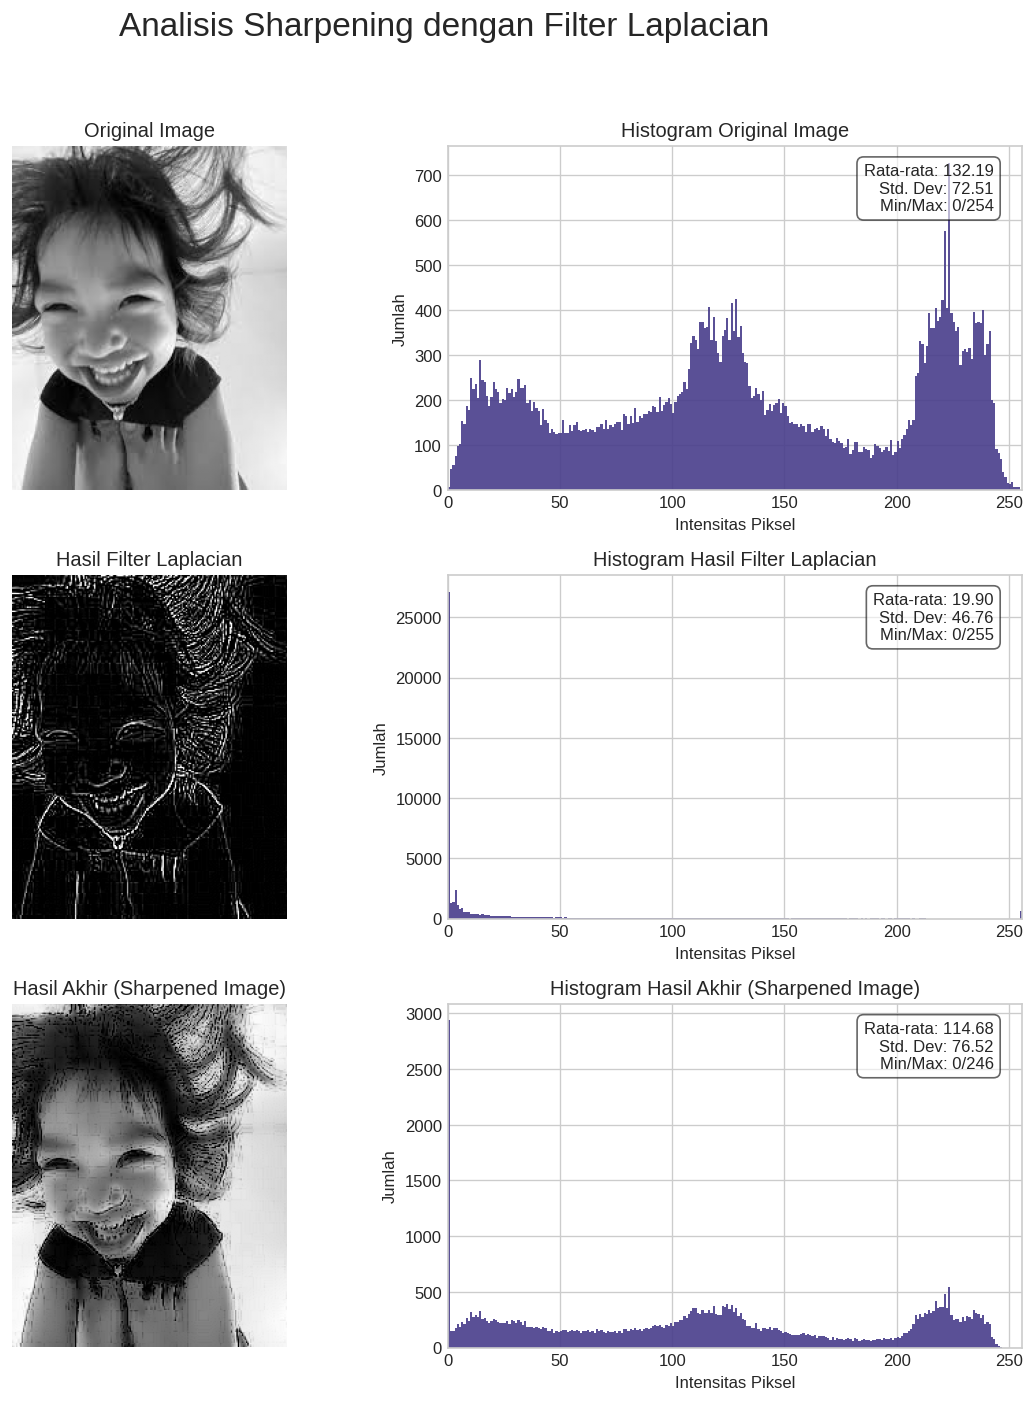

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

url = "https://raw.githubusercontent.com/azharm2412/PCD_Assignment02/main/images/11.jpg"
img_path = "11.jpg"

urllib.request.urlretrieve(url, img_path)
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sharpen_kernel_laplacian = np.array([
    [-1,-1,-1],
    [-1, 8,-1],
    [-1,-1,-1]
])

laplacian_image = cv2.filter2D(gray, -1, kernel=sharpen_kernel_laplacian)
final_sharpened_image = cv2.subtract(gray, laplacian_image)

images_to_analyze = [
    {'title': 'Original Image', 'image': gray},
    {'title': 'Hasil Filter Laplacian', 'image': laplacian_image},
    {'title': 'Hasil Akhir (Sharpened Image)', 'image': final_sharpened_image}
]

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 12), dpi=120)
plt.suptitle('Analisis Sharpening dengan Filter Laplacian', fontsize=20, y=0.97)

for i, data in enumerate(images_to_analyze):
    img_data = data['image']
    title = data['title']

    # hitung statistik
    mean_val = np.mean(img_data)
    std_dev = np.std(img_data)
    min_val = np.min(img_data)
    max_val = np.max(img_data)

    plt.subplot(3, 2, 2*i + 1)
    plt.imshow(img_data, cmap='gray')
    plt.title(title, fontsize=12)
    plt.axis('off')

    plt.subplot(3, 2, 2*i + 2)
    plt.hist(img_data.ravel(), bins=256, range=[0, 256], color='darkslateblue', alpha=0.9)
    plt.title(f'Histogram {title}', fontsize=12)
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Jumlah')
    plt.xlim([0, 256])

    stats_text = (f"Rata-rata: {mean_val:.2f}\n"
                  f"Std. Dev: {std_dev:.2f}\n"
                  f"Min/Max: {min_val}/{max_val}")

    plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round,pad=0.4', fc='white', alpha=0.6))

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

## **Analisis**


---


* Tepi diagonal pada rambut dan tekstur kulit sangat menonjol
* Nilai rata-rata 114.68 menunjukkan gambar sedikit lebih gelap dibanding kernel pertama. Standar deviasi 76.52 berarti kontras gambar masih lebar dan tetap tinggi. Rentang nilai 0 sampai 246 menunjukkan bagian terang tidak sampai maksimal, jadi highlight lebih terkendali, sedangkan area gelap tetap menekan ke nilai rendah
* Karena kernel ini menggunakan delapan tetangga, hasil penajamannya lebih kuat. Akibatnya tepi terlihat lebih tajam, tapi juga muncul lebih banyak noise dan gambar jadi agak lebih gelap
